In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# Numpy n-dim array -> shape
print (train_images.shape) 
print (train_labels)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
[5 0 4 ... 5 6 8]


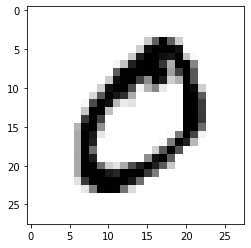

0


In [3]:
import matplotlib.pyplot as plt
digit = train_images[1]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
print (train_labels[1])

In [0]:
from keras import models
from keras import layers
from keras.layers import Flatten, BatchNormalization, Dense, Activation, Conv2D, Dropout

network = models.Sequential()
network.add(Flatten(input_shape=[28, 28]))
network.add(BatchNormalization())
network.add(Dense(300, kernel_initializer="he_normal", use_bias=False))
network.add(BatchNormalization())
network.add(Activation("elu"))
network.add(Dense(100, kernel_initializer="he_normal", use_bias=False))
network.add(BatchNormalization())
network.add(Activation("elu"))
network.add(Dense(10, activation='softmax'))

In [0]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

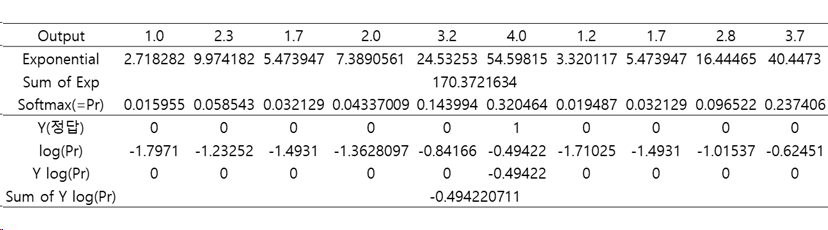

In [0]:
train_images = train_images.reshape((60000, 28, 28))
# train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28))
# test_images = test_images.astype('float32') / 255

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [8]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 784)               3136      
_________________________________________________________________
dense_1 (Dense)              (None, 300)               235200    
_________________________________________________________________
batch_normalization_2 (Batch (None, 300)               1200      
_________________________________________________________________
activation_1 (Activation)    (None, 300)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30000     
_________________________________________________________________
batch_normalization_3 (Batch (None, 100)              

In [19]:
network.fit(train_images, train_labels, epochs=5, batch_size=128, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 50us/step - loss: 0.2867 - accuracy: 0.9167 - val_loss: 0.1825 - val_accuracy: 0.9504
Epoch 2/5
48000/48000 [==============================] - 2s 43us/step - loss: 0.1509 - accuracy: 0.9559 - val_loss: 0.1606 - val_accuracy: 0.9585
Epoch 3/5
48000/48000 [==============================] - 2s 43us/step - loss: 0.1067 - accuracy: 0.9681 - val_loss: 0.1447 - val_accuracy: 0.9637
Epoch 4/5
48000/48000 [==============================] - 2s 43us/step - loss: 0.0825 - accuracy: 0.9749 - val_loss: 0.1410 - val_accuracy: 0.9669
Epoch 5/5
48000/48000 [==============================] - 2s 44us/step - loss: 0.0679 - accuracy: 0.9783 - val_loss: 0.1402 - val_accuracy: 0.9707


In [10]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 70us/step


In [11]:
print('test_acc:', test_acc)

test_acc: 0.9688000082969666


In [12]:
test_images.shape

(10000, 28, 28)

In [0]:
prediction = network.predict(test_images)

In [14]:
prediction[0]

array([2.5369175e-07, 1.6633038e-07, 3.4964323e-05, 1.0387481e-03,
       6.8228490e-09, 6.3925592e-07, 1.3520745e-09, 9.9891853e-01,
       7.0327934e-07, 6.1095825e-06], dtype=float32)

In [15]:
import numpy as np
np.argmax(prediction[0])

7

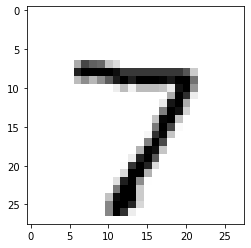

In [16]:
import matplotlib.pyplot as plt
digit = np.reshape(test_images[0], (28, 28))
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()